In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen
import pprint

In [2]:
lap_times = {
            'Circuit':[],
            'round':[],
            'lap_number': [],
            'driver': [],
            'position': [],
            'time': []
            }

In [3]:
# This loop 
for f1_round in list(range(1,17)):
    
    url = 'http://ergast.com/api/f1/2022/{}/laps.json?limit=100000&offset=0'
    r = requests.get(url.format(f1_round))
    data = r.json()
    
    gp = data['MRData']['RaceTable']['Races'][0]
    
    
    

    for item in gp['Laps']:
        i = 0

        for item_2 in item['Timings']:
            # The number of the lap 
            
            lap_times['lap_number'].append(int(item['number']))
            lap_times['driver'].append(item_2['driverId'])
            lap_times['position'].append(item_2['position'])
            lap_times['time'].append(item_2['time'])
            lap_times['round'].append(gp['round'])
            lap_times['Circuit'].append(gp['Circuit']['circuitId'])
            
            
            
            
        
        
        

In [4]:
df = pd.DataFrame(lap_times)


In [5]:
df

,Circuit,round,lap_number,driver,position,time
0,bahrain,1,1,leclerc,1,1:39.070
1,bahrain,1,1,max_verstappen,2,1:40.236
2,bahrain,1,1,sainz,3,1:41.006
3,bahrain,1,1,hamilton,4,1:41.555
4,bahrain,1,1,kevin_magnussen,5,1:42.333
...,...,...,...,...,...,...
17338,monza,16,53,gasly,8,2:03.490
17339,monza,16,53,de_vries,9,2:02.870
17340,monza,16,53,zhou,10,2:01.697
17341,monza,16,53,ocon,11,2:00.319


In [6]:
# Let's try to plot for the first race of the seasson

In [7]:
round_16 = df[df['round'] == '16']

In [8]:
round_16

,Circuit,round,lap_number,driver,position,time
16374,monza,16,1,leclerc,1,1:28.085
16375,monza,16,1,russell,2,1:29.427
16376,monza,16,1,ricciardo,3,1:30.751
16377,monza,16,1,max_verstappen,4,1:30.827
16378,monza,16,1,gasly,5,1:31.681
...,...,...,...,...,...,...
17338,monza,16,53,gasly,8,2:03.490
17339,monza,16,53,de_vries,9,2:02.870
17340,monza,16,53,zhou,10,2:01.697
17341,monza,16,53,ocon,11,2:00.319


In [9]:
pilotos = round_16['driver'].unique()
lap_numbers = round_16['lap_number'].unique()
laps_round_16 = len(lap_numbers)

In [10]:
round_16_pos = pd.DataFrame()
round_16_pos = pd.DataFrame(columns = pilotos)

In [11]:
for piloto in pilotos:
    #print('For:',piloto,'estos son los resultados:')
    
    positions = round_16[round_16['driver'] == piloto]
    positions_pilot = positions['position']
    
    positions_pilot = positions_pilot.to_list()
    positions_pilot = [int(x) for x in positions_pilot]
    
    
    
    if len(positions_pilot) <laps_round_16:

        x = laps_round_16 -len(positions_pilot)

        a = np.zeros(x)
        a[:] = np.nan
        a = a.tolist()

        
        positions_pilot = positions_pilot + a
        

        

    
    round_16_pos[piloto] = positions_pilot
       
    

In [12]:
pilotos

array(['leclerc', 'russell', 'ricciardo', 'max_verstappen', 'gasly',
       'norris', 'alonso', 'de_vries', 'zhou', 'vettel', 'stroll',
       'kevin_magnussen', 'ocon', 'latifi', 'perez', 'sainz',
       'mick_schumacher', 'tsunoda', 'hamilton', 'bottas'], dtype=object)

In [13]:
round_16_pos

,leclerc,russell,ricciardo,max_verstappen,gasly,norris,alonso,de_vries,zhou,vettel,stroll,kevin_magnussen,ocon,latifi,perez,sainz,mick_schumacher,tsunoda,hamilton,bottas
0,1,2,3.0,4,5,6,7.0,8,9,10.0,11.0,12.0,13,14.0,15,16,17,18.0,19,20.0
1,1,2,4.0,3,5,6,7.0,8,9,11.0,10.0,13.0,12,15.0,16,14,19,17.0,18,20.0
2,1,2,4.0,3,5,6,7.0,8,9,11.0,10.0,13.0,12,16.0,15,14,19,17.0,18,20.0
3,1,2,4.0,3,5,6,7.0,8,9,11.0,10.0,15.0,12,16.0,14,13,19,17.0,18,20.0
4,1,3,4.0,2,5,6,7.0,8,9,12.0,10.0,15.0,13,16.0,14,11,19,17.0,18,20.0
5,1,3,4.0,2,5,6,7.0,8,9,12.0,11.0,15.0,14,16.0,13,10,19,17.0,18,20.0
6,1,3,4.0,2,5,6,7.0,8,9,12.0,11.0,14.0,13,16.0,18,10,19,15.0,17,20.0
7,1,3,4.0,2,5,6,7.0,8,10,12.0,11.0,15.0,13,17.0,20,9,18,14.0,16,19.0
8,1,3,4.0,2,5,6,7.0,9,10,12.0,11.0,16.0,13,17.0,20,8,18,14.0,15,19.0
9,1,3,4.0,2,5,6,8.0,9,10,13.0,11.0,16.0,12,17.0,20,7,18,14.0,15,19.0


In [14]:
def define_driver_color(driver):
    
    if driver == 'sainz' or driver == 'leclerc':
        color = (255/255,   45/255,  0 /255)

        
    elif driver == 'max_verstappen' or driver == 'perez':
        color = (16/255,   0/255,  255/255)

        
    elif driver == 'hamilton' or driver == 'russell':
        color = (11/255,   214/255,  197/255)

        
    elif driver == 'kevin_magnussen' or driver == 'mick_schumacher':
        color = (156/255,   12/255,  33/255)

        
    elif driver == 'gasly' or driver == 'tsunoda':
        color = (178/255,   196/255,  213/255)

    elif driver == 'alonso' or driver == 'ocon':
        color = (255/255,   0/255,  209/255)

        
    elif driver == 'albon' or driver == 'latifi' or driver == 'de_vries':
        color = (87/255,   139/255,  187/255)

        
    elif driver == 'bottas' or driver == 'zhou':
        color = (155/255,   42/255,  42/255)

        
    elif driver == 'hulkenberg' or driver == 'stroll' or driver == 'vettel':
        color = (14/255,   98/255,  15/255)

        
    elif driver == 'norris' or driver == 'ricciardo':
        color = (255/255,   142/255,  0/255)

    else:
        print('none!')
    
    return color

<Figure size 432x288 with 0 Axes>

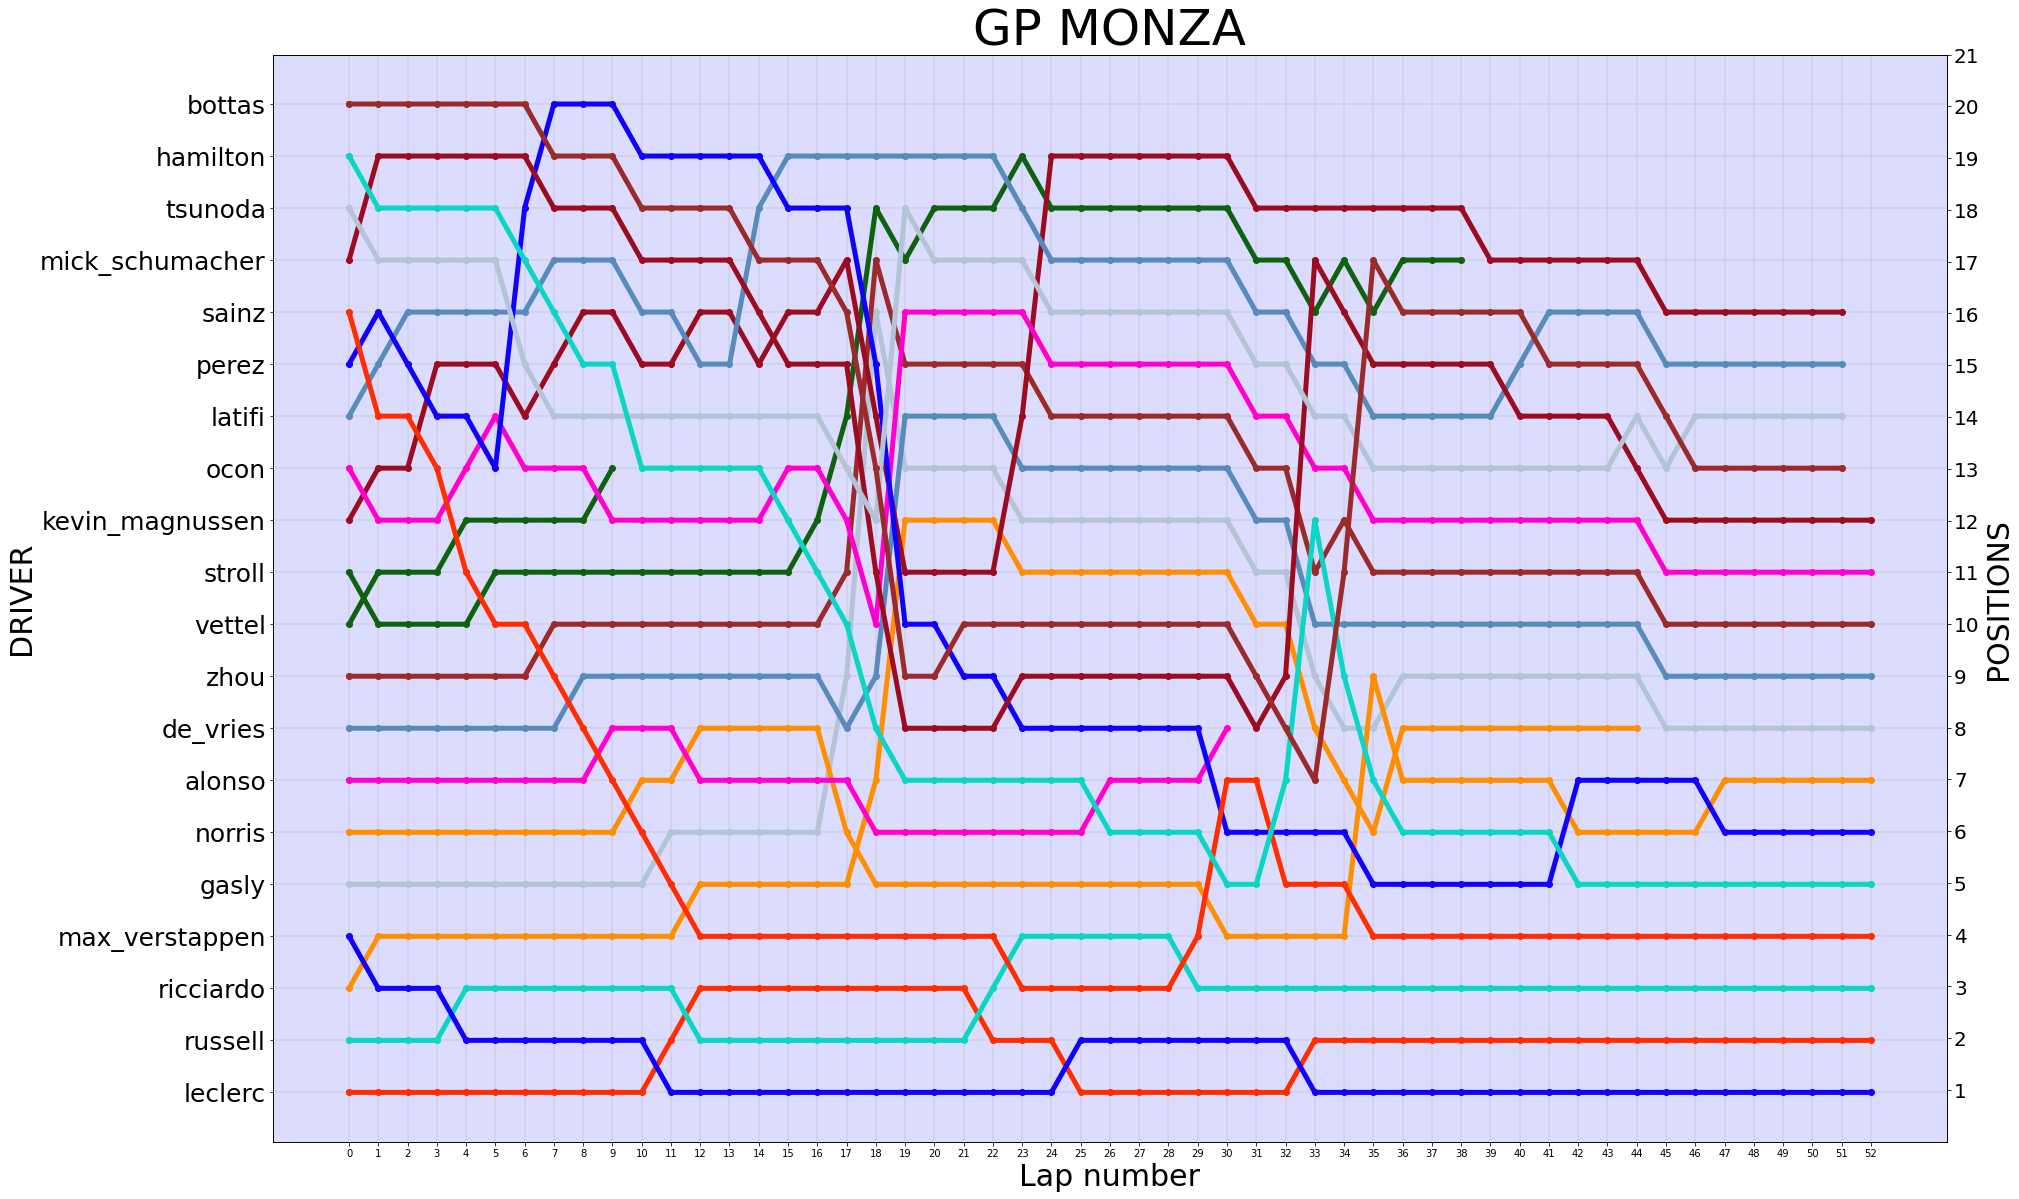

In [19]:
def create_plot(df):
    
    pilotos = df.columns.to_list()
    laps = df.index.values.tolist() 
    fig = plt.figure()
    fig, ax = plt.subplots()
    
    fig.set_figheight(20)
    fig.set_figwidth(30)
    
    for i in range(df.shape[1]):
        driver = pilotos[i]
        color_aux = define_driver_color(driver)
        plt.plot(laps,df.iloc[:,i], linewidth=5,marker='o', linestyle="-", color = color_aux)

        
    
    plt.yticks(np.arange(1,21), pilotos, size = 25)
    ax2=ax.twinx()
    ax2.set_ylabel("POSITIONS",fontsize=30)
    ax.set_ylabel('DRIVER',fontsize = 30)
    ax.set_xlabel('Lap number', fontsize = 30)
    
    plt.yticks(np.arange(1, 22, step=1),size = 20)
    
    ax.set_facecolor((220/255,220/255 ,255/255  ))
    ax.grid(axis='both', linewidth=0.45)
    plt.ylim([0, 21])
    plt.xticks(np.arange(0, 53, step=1))
    plt.title('GP MONZA',size = 50)
    plt.show();

create_plot(round_16_pos)